# Formula 1 Analysis

In this notebook, we will try various analyses with F1 Data from Kaggle - [Formula 1 World Championship 1950 - 2023 Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)



In [2]:
import warnings

# Import required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# ignore random API warnings
warnings.simplefilter("ignore")

## Description of our F1 Data.

The F1 data is structured across 14 files from [Kaggle](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

+ Circuits - Descriptive Information about F1 Circuits from 1950 - 2023
+ Seasons - Just a simple file of each season year
+ Races - Information on each race and date it was held and circuit it was held on.
+ Constructors - Descriptive Information about each F1 Team
+ Constructor Results - Race results for each Constructor (Manufacturer).
+ Constructor Standings - The positional standing of the constructor after each race; cyclical - repeats every year.
+ Drivers - A descriptive file about the Drivers, including name, dob, nationality
+ Results - Results of each driver for every race, including fastest times, speed, laps and race result.
+ Drivers Standings - The positional standing of drivers after each race, including number of wins; cyclical - resets and repeats every year
+ Qualifying - Results of qualitfying for each driver, for each race or each of Q1, Q2 and Q3 sessions.
+ Lap Times - Time and position for each lap of every race
+ Pit Stops - Pit Stops for most races; Stop number and stop times (not for all races)
+ Sprint Results - A short format race on the day of qualifying; generally orthogonal to the rest of the data (*we won't use it for our analysis*)
+ Status - Description of Race status codes for driviers (Finished, DNF, Mech Failure etc.)

In addition to the above, we created a new file from a different data source on Wikipedia - [List of Formula 1 Circuits](https://en.wikipedia.org/wiki/List_of_Formula_One_circuits) to get more details on the circuit type information.  This will be used to predict if a circuit is **Street Circuit** or a **Track Circuit** based on various characteristics that we can observe.  This data is represented in the following file:
+ Circuits Info - Additional Descriptive Information about Formula 1 Circuits including whether a circuit is a street or a track circuit

## Load and review all the Data

Let's read all the files and review their makeup via display and describe.


### Circuits

In [3]:
# Load and review circuit related information
circuits_df = pd.read_csv("data/circuits.csv")
print("Circuits")
display(circuits_df)
display(circuits_df.describe().T)
circuits_info_df = pd.read_csv("data/circuits_info.csv")
print("Circuits Info")
display(circuits_info_df)
display(circuits_info_df.describe().T)

Circuits


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,25,galvez,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.4593,8,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Os...
1,29,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.6170,58,http://en.wikipedia.org/wiki/Adelaide_Street_C...
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.7647,678,http://en.wikipedia.org/wiki/Red_Bull_Ring
4,57,zeltweg,Zeltweg,Styria,Austria,47.2039,14.7478,676,http://en.wikipedia.org/wiki/Zeltweg_Airfield
...,...,...,...,...,...,...,...,...,...
72,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,\N,http://en.wikipedia.org/wiki/Miami_Internation...
73,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...
74,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.2730,470,http://en.wikipedia.org/wiki/Riverside_Interna...
75,63,sebring,Sebring International Raceway,Florida,USA,27.4547,-81.3483,18,http://en.wikipedia.org/wiki/Sebring_Raceway


,count,mean,std,min,25%,50%,75%,max
circuitId,77.0,39.883117,23.001701,1.0000,20.00000,40.00000,59.0000,80.0000
lat,77.0,33.442925,22.808866,-37.8497,32.77740,40.95170,46.9589,57.2653
lng,77.0,1.076683,65.516951,-118.1890,-9.39417,3.93083,19.2486,144.9680


Circuits Info


,Circuit,circuitRef,Circuit_fixed,Current,Type,Direction,Location,Country,Last length used,Grands Prix,Season(s),Grands Prix held
0,Autódromo Juan y Oscar Gálvez,galvez,Autódromo Juan y Oscar Gálvez,0,Race circuit,Clockwise,Buenos Aires,Argentina,4.259 km (2.646 mi),Argentine Grand Prix,"1953–1958, 1960, 1972–1975, 1977–1981, 1995–1998",20
1,Adelaide Street Circuit,adelaide,Adelaide Street Circuit,0,Street circuit,Clockwise,Adelaide,Australia,3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
2,Albert Park Circuit ✔,albert_park,Albert Park Circuit,1,Street circuit,Clockwise,Melbourne,Australia,5.278 km (3.280 mi),Australian Grand Prix,"1996–2019, 2022–2023",26
3,Red Bull Ring ✔,red_bull_ring,Red Bull Ring,1,Race circuit,Clockwise,Spielberg,Austria,4.318 km (2.683 mi),"Austrian Grand Prix,","1970–1987, 1997–2003, 2014–2023[c]",35
4,Zeltweg Airfield,zeltweg,Zeltweg Airfield,0,Road circuit,Clockwise,Zeltweg,Austria,3.186 km (1.980 mi),Austrian Grand Prix,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Phoenix Street Circuit,phoenix,Phoenix Street Circuit,0,Street circuit,Anti-clockwise,Phoenix,United States,3.720 km (2.312 mi),United States Grand Prix,1989–1991,3
73,Riverside International Raceway,riverside,Riverside International Raceway,0,Race circuit,Clockwise,Moreno Valley,United States,5.271 km (3.275 mi),United States Grand Prix,1960,1
74,Sebring Raceway,sebring,Sebring Raceway,0,Road circuit,Clockwise,Sebring,United States,8.356 km (5.192 mi),United States Grand Prix,1959,1
75,Las Vegas Strip Circuit ✔,vegas,Las Vegas Strip Circuit,1,Street circuit,Anti-clockwise,Paradise,United States,6.120 km (3.803 mi),Las Vegas Grand Prix,2023[11],0


,count,mean,std,min,25%,50%,75%,max
Current,77.0,0.285714,0.454716,0.0,0.0,0.0,1.0,1.0
Grands Prix held,77.0,13.324675,16.207894,0.0,2.0,7.0,19.0,72.0


### Seasons and Races

In [4]:
# Load and review Season and Race information
seasons_df = pd.read_csv('data/seasons.csv')
print("Seasons")
display(seasons_df)
display(seasons_df.describe().T)
races_df = pd.read_csv('data/races.csv')
print("Races")
display(races_df)
display(races_df.describe().T)

Seasons


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
...,...,...
69,2019,http://en.wikipedia.org/wiki/2019_Formula_One_...
70,2020,http://en.wikipedia.org/wiki/2020_Formula_One_...
71,2021,http://en.wikipedia.org/wiki/2021_Formula_One_...
72,2022,http://en.wikipedia.org/wiki/2022_Formula_One_...


,count,mean,std,min,25%,50%,75%,max
year,74.0,1986.5,21.505813,1950.0,1968.25,1986.5,2004.75,2023.0


Races


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


,count,mean,std,min,25%,50%,75%,max
raceId,1102.0,553.853902,321.706151,1.0,276.25,551.5,826.75,1120.0
year,1102.0,1992.049002,20.308639,1950.0,1976.00,1994.0,2010.00,2023.0
round,1102.0,8.507260,5.097545,1.0,4.00,8.0,12.00,23.0
circuitId,1102.0,23.697822,19.337398,1.0,9.00,18.0,34.00,80.0


### Constructors

In [5]:
# Load and review Constructor information
constructors_df = pd.read_csv('data/constructors.csv')
constructor_results_df = pd.read_csv("data/constructor_results.csv")
constructor_standings_df = pd.read_csv("data/constructor_standings.csv")
print("Constructors")
display(constructors_df)
display(constructors_df.describe().T)
print("Constructor Results")
display(constructor_results_df)
display(constructor_results_df.describe().T)
print("Constructor Standings")
display(constructor_standings_df)
display(constructor_standings_df.describe().T)

Constructors


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


,count,mean,std,min,25%,50%,75%,max
constructorId,211.0,107.037915,61.653629,1.0,54.5,107.0,159.5,214.0


Constructor Results


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12165,16665,1096,117,5.0,\N
12166,16666,1096,213,0.0,\N
12167,16667,1096,51,0.0,\N
12168,16668,1096,3,0.0,\N


,count,mean,std,min,25%,50%,75%,max
constructorResultsId,12170.0,8106.815037,5523.404639,1.0,3043.25,6085.5,13593.75,16669.0
raceId,12170.0,505.922350,298.367868,1.0,278.00,474.0,713.00,1096.0
constructorId,12170.0,44.160394,57.248981,1.0,6.00,22.0,52.00,214.0
points,12170.0,3.788661,7.427196,0.0,0.00,0.0,4.00,66.0


Constructor Standings


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12936,28408,1098,210,0.0,6,6,0
12937,28409,1098,1,0.0,7,7,0
12938,28410,1098,131,0.0,8,8,0
12939,28411,1098,9,0.0,9,9,0


,count,mean,std,min,25%,50%,75%,max
constructorStandingsId,12941.0,16573.817402,8741.992501,1.0,8771.0,20124.0,24592.0,28412.0
raceId,12941.0,515.004946,292.559215,1.0,294.0,494.0,714.0,1098.0
constructorId,12941.0,48.070474,59.400459,1.0,6.0,25.0,57.0,214.0
points,12941.0,33.776486,76.875428,0.0,0.0,6.0,31.0,765.0
position,12941.0,7.286068,4.386319,1.0,4.0,7.0,10.0,22.0
wins,12941.0,0.678927,1.818736,0.0,0.0,0.0,0.0,19.0


### Drivers


In [28]:
# Load and review Driver information
drivers_df = pd.read_csv('data/drivers.csv')
results_df = pd.read_csv("data/results.csv")
driver_standings_df = pd.read_csv("data/driver_standings.csv")
print("Drivers")
display(drivers_df)
display(drivers_df.describe().T)
print("Driver Results")
display(results_df)
display(results_df.describe().T)
print("Driver Standings")
display(driver_standings_df)
display(driver_standings_df.describe().T)

Drivers


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


,count,mean,std,min,25%,50%,75%,max
driverId,857.0,429.057176,247.632402,1.0,215.0,429.0,643.0,858.0


Driver Results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


,count,mean,std,min,25%,50%,75%,max
resultId,25840.0,12921.334327,7460.682031,1.0,6460.75,12920.5,19380.25,25845.0
raceId,25840.0,531.425813,299.440908,1.0,293.00,514.0,784.00,1096.0
driverId,25840.0,261.732082,268.623016,1.0,56.00,163.0,360.00,856.0
constructorId,25840.0,48.628328,59.732131,1.0,6.00,25.0,58.00,214.0
grid,25840.0,11.179063,7.243725,0.0,5.00,11.0,17.00,34.0
positionOrder,25840.0,12.876006,7.712391,1.0,6.00,12.0,18.00,39.0
points,25840.0,1.877053,4.169849,0.0,0.00,0.0,2.00,50.0
laps,25840.0,45.977515,29.808951,0.0,22.00,52.0,66.00,200.0
statusId,25840.0,17.568692,26.155476,1.0,1.00,11.0,14.00,141.0


Driver Standings


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


,count,mean,std,min,25%,50%,75%,max
driverStandingsId,33902.0,42342.373901,21668.533758,1.0,19594.25,49563.5,58779.75,71845.0
raceId,33902.0,569.165506,281.792241,1.0,345.00,593.0,795.00,1098.0
driverId,33902.0,304.342782,264.834962,1.0,85.00,219.0,501.00,858.0
points,33902.0,13.329134,35.392937,0.0,0.00,1.0,10.00,454.0
position,33902.0,19.958085,16.425503,1.0,8.00,16.0,26.00,108.0
wins,33902.0,0.268893,0.992981,0.0,0.00,0.0,0.00,15.0


### Race & Status Details


In [7]:
# Load and review Race detail information
qualifying_df = pd.read_csv('data/qualifying.csv')
lap_times_df = pd.read_csv("data/lap_times.csv")
pit_stops_df = pd.read_csv("data/pit_stops.csv")
status_df = pd.read_csv("data/status.csv")
print("Qualifying")
display(qualifying_df)
display(qualifying_df.describe().T)
print("Lap Times")
display(lap_times_df)
display(lap_times_df.describe().T)
print("Pit Stops")
display(pit_stops_df)
display(pit_stops_df.describe().T)
print("Status")
display(status_df)
display(status_df.describe().T)

Qualifying


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9570,9628,1096,825,210,20,16,1:25.834,\N,\N
9571,9629,1096,842,213,10,17,1:25.859,\N,\N
9572,9630,1096,822,51,77,18,1:25.892,\N,\N
9573,9631,1096,848,3,23,19,1:26.028,\N,\N


,count,mean,std,min,25%,50%,75%,max
qualifyId,9575.0,4798.950078,2777.072171,1.0,2395.5,4790.0,7203.5,9632.0
raceId,9575.0,576.919582,418.409302,1.0,116.5,851.0,972.0,1096.0
driverId,9575.0,303.456710,377.386772,1.0,15.0,49.0,817.0,856.0
constructorId,9575.0,43.512376,69.884962,1.0,4.0,9.0,25.0,214.0
number,9575.0,17.865483,17.633755,0.0,7.0,14.0,22.0,99.0
position,9575.0,11.263603,6.302077,1.0,6.0,11.0,17.0,28.0


Lap Times


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


,count,mean,std,min,25%,50%,75%,max
raceId,538121.0,551.226841,422.395496,1.0,129.0,841.0,966.0,1096.0
driverId,538121.0,285.445078,373.403612,1.0,15.0,37.0,817.0,856.0
lap,538121.0,29.965461,18.412489,1.0,14.0,29.0,44.0,87.0
position,538121.0,9.651287,5.539014,1.0,5.0,9.0,14.0,24.0
milliseconds,538121.0,95720.792638,74774.356932,55404.0,82071.0,90673.0,102319.0,7507547.0


Pit Stops


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


,count,mean,std,min,25%,50%,75%,max
raceId,9634.0,956.103384,76.862933,841.0,885.00,953.0,1024.00,1096.0
driverId,9634.0,513.030828,391.682304,1.0,18.00,815.0,830.00,856.0
stop,9634.0,1.760536,0.914522,1.0,1.00,2.0,2.00,6.0
lap,9634.0,25.255553,14.579838,1.0,13.00,25.0,36.00,78.0
milliseconds,9634.0,72401.730641,273833.956873,12897.0,21908.25,23557.0,26186.75,3069017.0


Status


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


,count,mean,std,min,25%,50%,75%,max
statusId,139.0,71.23741,41.092434,1.0,35.5,72.0,106.5,141.0


In [81]:
status_df

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


## Circuit Segmentation

For this first exercise. We will try to segment our circuits into *street circuits* and *track circuits* using various segmentation algorithms.

First we have to prepare the dataset.  We need to combine our new data source with the main dataset.


In [14]:
display(circuits_df)
display(circuits_info_df)
display(circuits_df.describe().T)
display(circuits_info_df.describe().T)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,25,galvez,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.4593,8,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Os...
1,29,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.6170,58,http://en.wikipedia.org/wiki/Adelaide_Street_C...
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.7647,678,http://en.wikipedia.org/wiki/Red_Bull_Ring
4,57,zeltweg,Zeltweg,Styria,Austria,47.2039,14.7478,676,http://en.wikipedia.org/wiki/Zeltweg_Airfield
...,...,...,...,...,...,...,...,...,...
72,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,\N,http://en.wikipedia.org/wiki/Miami_Internation...
73,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...
74,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.2730,470,http://en.wikipedia.org/wiki/Riverside_Interna...
75,63,sebring,Sebring International Raceway,Florida,USA,27.4547,-81.3483,18,http://en.wikipedia.org/wiki/Sebring_Raceway


,Circuit,circuitRef,Circuit_fixed,Current,Type,Direction,Location,Country,Last length used,Grands Prix,Season(s),Grands Prix held
0,Autódromo Juan y Oscar Gálvez,galvez,Autódromo Juan y Oscar Gálvez,0,Race circuit,Clockwise,Buenos Aires,Argentina,4.259 km (2.646 mi),Argentine Grand Prix,"1953–1958, 1960, 1972–1975, 1977–1981, 1995–1998",20
1,Adelaide Street Circuit,adelaide,Adelaide Street Circuit,0,Street circuit,Clockwise,Adelaide,Australia,3.780 km (2.349 mi),Australian Grand Prix,1985–1995,11
2,Albert Park Circuit ✔,albert_park,Albert Park Circuit,1,Street circuit,Clockwise,Melbourne,Australia,5.278 km (3.280 mi),Australian Grand Prix,"1996–2019, 2022–2023",26
3,Red Bull Ring ✔,red_bull_ring,Red Bull Ring,1,Race circuit,Clockwise,Spielberg,Austria,4.318 km (2.683 mi),"Austrian Grand Prix,","1970–1987, 1997–2003, 2014–2023[c]",35
4,Zeltweg Airfield,zeltweg,Zeltweg Airfield,0,Road circuit,Clockwise,Zeltweg,Austria,3.186 km (1.980 mi),Austrian Grand Prix,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Phoenix Street Circuit,phoenix,Phoenix Street Circuit,0,Street circuit,Anti-clockwise,Phoenix,United States,3.720 km (2.312 mi),United States Grand Prix,1989–1991,3
73,Riverside International Raceway,riverside,Riverside International Raceway,0,Race circuit,Clockwise,Moreno Valley,United States,5.271 km (3.275 mi),United States Grand Prix,1960,1
74,Sebring Raceway,sebring,Sebring Raceway,0,Road circuit,Clockwise,Sebring,United States,8.356 km (5.192 mi),United States Grand Prix,1959,1
75,Las Vegas Strip Circuit ✔,vegas,Las Vegas Strip Circuit,1,Street circuit,Anti-clockwise,Paradise,United States,6.120 km (3.803 mi),Las Vegas Grand Prix,2023[11],0


,count,mean,std,min,25%,50%,75%,max
circuitId,77.0,39.883117,23.001701,1.0000,20.00000,40.00000,59.0000,80.0000
lat,77.0,33.442925,22.808866,-37.8497,32.77740,40.95170,46.9589,57.2653
lng,77.0,1.076683,65.516951,-118.1890,-9.39417,3.93083,19.2486,144.9680


,count,mean,std,min,25%,50%,75%,max
Current,77.0,0.285714,0.454716,0.0,0.0,0.0,1.0,1.0
Grands Prix held,77.0,13.324675,16.207894,0.0,2.0,7.0,19.0,72.0


In [18]:
# Just get the 'Type' feature from the circuit info data
merged_circuits_df = pd.merge(circuits_df,circuits_info_df[['circuitRef','Type']],on = "circuitRef")
display(merged_circuits_df)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url,Type
0,25,galvez,Autódromo Juan y Oscar Gálvez,Buenos Aires,Argentina,-34.6943,-58.4593,8,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Os...,Race circuit
1,29,adelaide,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.6170,58,http://en.wikipedia.org/wiki/Adelaide_Street_C...,Street circuit
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street circuit
3,70,red_bull_ring,Red Bull Ring,Spielberg,Austria,47.2197,14.7647,678,http://en.wikipedia.org/wiki/Red_Bull_Ring,Race circuit
4,57,zeltweg,Zeltweg,Styria,Austria,47.2039,14.7478,676,http://en.wikipedia.org/wiki/Zeltweg_Airfield,Road circuit
...,...,...,...,...,...,...,...,...,...,...
72,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,\N,http://en.wikipedia.org/wiki/Miami_Internation...,Street circuit
73,33,phoenix,Phoenix street circuit,Phoenix,USA,33.4479,-112.0750,345,http://en.wikipedia.org/wiki/Phoenix_street_ci...,Street circuit
74,60,riverside,Riverside International Raceway,California,USA,33.9370,-117.2730,470,http://en.wikipedia.org/wiki/Riverside_Interna...,Race circuit
75,63,sebring,Sebring International Raceway,Florida,USA,27.4547,-81.3483,18,http://en.wikipedia.org/wiki/Sebring_Raceway,Road circuit


In [17]:
display(races_df)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [29]:
#races_type_df = races_type_df.raceId.astype(int)
races_type_df = pd.merge(races_df,merged_circuits_df[['circuitRef','circuitId','Type']], on = 'circuitId')
races_type_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,Type
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
1,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
2,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
3,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
4,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,http://en.wikipedia.org/wiki/2005_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Street circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1075,2022,2,77,Saudi Arabian Grand Prix,2022-03-27,17:00:00,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,2022-03-25,14:00:00,2022-03-25,17:00:00,2022-03-26,14:00:00,2022-03-26,17:00:00,\N,\N,jeddah,Street circuit
1098,1099,2023,2,77,Saudi Arabian Grand Prix,2023-03-19,17:00:00,https://en.wikipedia.org/wiki/2023_Saudi_Arabi...,2023-03-17,13:30:00,2023-03-17,17:00:00,2023-03-18,13:30:00,2023-03-18,17:00:00,\N,\N,jeddah,Street circuit
1099,1078,2022,5,79,Miami Grand Prix,2022-05-08,19:30:00,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,2022-05-06,18:30:00,2022-05-06,21:30:00,2022-05-07,17:00:00,2022-05-07,20:00:00,\N,\N,miami,Street circuit
1100,1102,2023,5,79,Miami Grand Prix,2023-05-07,19:30:00,https://en.wikipedia.org/wiki/2023_Miami_Grand...,2023-05-05,17:30:00,2023-05-05,21:00:00,2023-05-06,16:30:00,2023-05-06,20:00:00,\N,\N,miami,Street circuit


In [30]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [33]:
results_by_circuit_type_df = pd.merge(results_df,races_type_df[['raceId','Type']], on = 'raceId')
results_by_circuit_type_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,Type
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,Street circuit
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,Street circuit
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,Street circuit
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,Street circuit
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,Street circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11,Race circuit
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11,Race circuit
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9,Race circuit
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130,Race circuit


In [37]:
results_by_circuit_type_df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
Type                object
dtype: object

In [65]:
convert = ['number','position','milliseconds','fastestLap','rank','fastestLapSpeed']
for item in convert:
    results_by_circuit_type_df[item] = pd.to_numeric(results_by_circuit_type_df[item],errors="coerce")

display(results_by_circuit_type_df.dtypes)
results_by_circuit_type_df


resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed    float64
statusId             int64
Type                object
dtype: object

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,Type
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,Street circuit
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1,Street circuit
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1,Street circuit
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1,Street circuit
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1,Street circuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,\N,NaN,39.0,12.0,1:29.833,211.632,11,Race circuit
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,\N,NaN,40.0,20.0,1:31.158,208.556,11,Race circuit
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,\N,NaN,42.0,11.0,1:29.788,211.738,9,Race circuit
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,\N,NaN,45.0,14.0,1:30.309,210.517,130,Race circuit


In [89]:
#display(df)
results_by_circuit_type_df.milliseconds.count()
df = results_by_circuit_type_df
df.groupby('Type').describe().T

Type            Race circuit  Road circuit  Street circuit
resultId count  20245.000000    759.000000     4836.000000
         mean   12804.453989  18407.370224    12549.610008
         std     7485.558674   1212.797088     7596.298471
         min       23.000000  15442.000000        1.000000
         25%     6232.000000  17714.500000     6485.750000
...                      ...           ...             ...
statusId min        1.000000      1.000000        1.000000
         25%        1.000000      5.000000        1.000000
         50%       11.000000     11.000000        8.500000
         75%       14.000000     22.500000       18.000000
         max      140.000000    124.000000      141.000000

[120 rows x 3 columns]

In [177]:
def numeric_type(data):
    """
    Convert Type into a numeric representation
        0 - Race Circuit
        1 - Street Circuit
        2 - Road Circuit
    """

    map_type = {'Race circuit': 0,'Street circuit': 1,'Road circuit': 2}
    data['Type'] = data['Type'].map(map_type)
    data['Type'].astype(int)

def non_finish_counts(data):
    """
    Add a feature to encomapss the number of non finishers in a race.

    :param data: The Dataframe being manipulated
    :return: return the dataframe
    """

    nfcounts = data[data['statusId'] != 1].groupby('raceId').size().reset_index(name='nonfinisherCount')
    new_df = data[data['position'] == 1]
    result = new_df.merge(nfcounts,on="raceId",how="left")
    return result

In [159]:
df_gt = df[["raceId","position","laps","fastestLapSpeed","milliseconds","statusId","Type"]]
numeric_type(df_gt)
df_gt = non_finish_counts(df_gt)
df_gt.groupby('Type').describe().T

Type                               0             1             2
raceId           count  8.430000e+02  2.020000e+02  3.700000e+01
                 mean   5.366607e+02  5.280149e+02  7.612973e+02
                 std    3.159821e+02  3.223200e+02  5.536037e+01
                 min    2.000000e+00  1.000000e+00  6.250000e+02
                 25%    2.600000e+02  2.735000e+02  7.320000e+02
                 50%    5.360000e+02  4.780000e+02  7.700000e+02
                 75%    8.050000e+02  8.447500e+02  8.050000e+02
                 max    1.096000e+03  1.091000e+03  8.380000e+02
position         count  8.430000e+02  2.020000e+02  3.700000e+01
                 mean   1.000000e+00  1.000000e+00  1.000000e+00
                 std    0.000000e+00  0.000000e+00  0.000000e+00
                 min    1.000000e+00  1.000000e+00  1.000000e+00
                 25%    1.000000e+00  1.000000e+00  1.000000e+00
                 50%    1.000000e+00  1.000000e+00  1.000000e+00
                 75%    1.000000e+00  1.000000e+00  1.000000e+00
                 max    1.000000e+00  1.000000e+00  1.000000e+00
laps             count  8.430000e+02  2.020000e+02  3.700000e+01
                 mean   6.370225e+01  7.053465e+01  6.032432e+01
                 std    2.173295e+01  1.325754e+01  1.816140e+01
                 min    1.000000e+00  1.400000e+01  1.800000e+01
                 25%    5.300000e+01  6.100000e+01  5.000000e+01
                 50%    6.200000e+01  7.000000e+01  6.000000e+01
                 75%    7.100000e+01  7.800000e+01  7.500000e+01
                 max    2.000000e+02  1.050000e+02  1.050000e+02
fastestLapSpeed  count  2.870000e+02  7.800000e+01  0.000000e+00
                 mean   2.120877e+02  1.915846e+02           NaN
                 std    1.644975e+01  2.605773e+01           NaN
                 min    1.742350e+02  1.513880e+02           NaN
                 25%    1.991075e+02  1.651823e+02           NaN
                 50%    2.102370e+02  2.025605e+02           NaN
                 75%    2.233060e+02  2.109995e+02           NaN
                 max    2.573200e+02  2.449620e+02           NaN
milliseconds     count  8.430000e+02  2.020000e+02  3.700000e+01
                 mean   6.201453e+06  6.727535e+06  9.056113e+06
                 std    1.584070e+06  1.490410e+06  1.721225e+06
                 min    2.070710e+05  1.474899e+06  6.511300e+06
                 25%    5.357750e+06  5.788626e+06  7.625500e+06
                 50%    5.774300e+06  6.589935e+06  8.780800e+06
                 75%    6.348124e+06  7.099914e+06  1.080000e+07
                 max    1.425805e+07  1.467954e+07  1.213100e+07
statusId         count  8.430000e+02  2.020000e+02  3.700000e+01
                 mean   1.000000e+00  1.000000e+00  1.000000e+00
                 std    0.000000e+00  0.000000e+00  0.000000e+00
                 min    1.000000e+00  1.000000e+00  1.000000e+00
                 25%    1.000000e+00  1.000000e+00  1.000000e+00
                 50%    1.000000e+00  1.000000e+00  1.000000e+00
                 75%    1.000000e+00  1.000000e+00  1.000000e+00
                 max    1.000000e+00  1.000000e+00  1.000000e+00
nonfinisherCount count  8.420000e+02  2.020000e+02  3.700000e+01
                 mean   1.732898e+01  1.759406e+01  1.797297e+01
                 std    6.758961e+00  7.064279e+00  4.106137e+00
                 min    1.000000e+00  3.000000e+00  1.000000e+01
                 25%    1.200000e+01  1.200000e+01  1.500000e+01
                 50%    1.700000e+01  1.800000e+01  1.800000e+01
                 75%    2.200000e+01  2.300000e+01  2.000000e+01
                 max    3.800000e+01  3.600000e+01  2.700000e+01

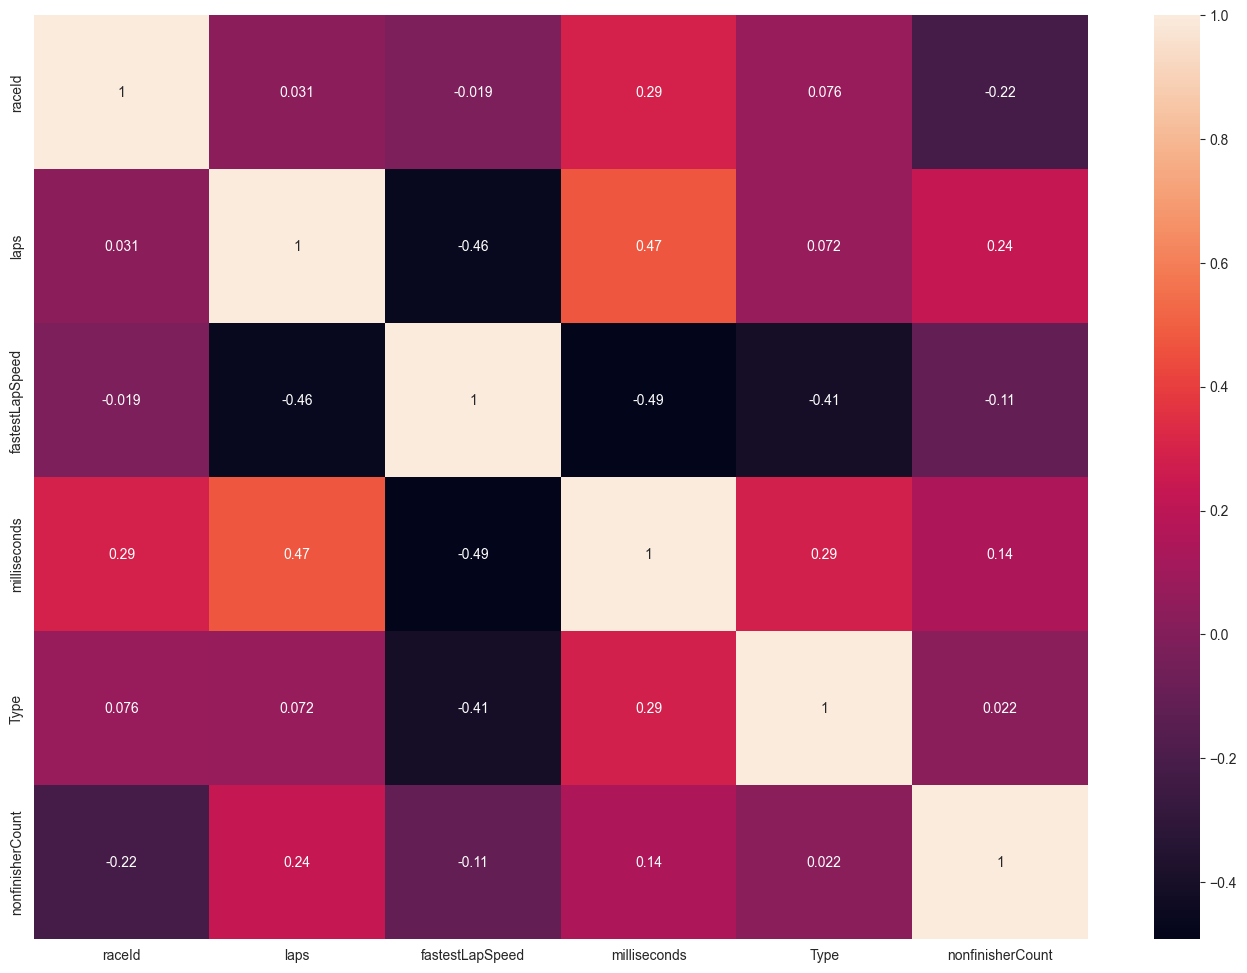

In [160]:
df_gt = df_gt.drop(["position","statusId"],axis=1)
plt.figure(figsize=(17,12))
sns.heatmap(df_gt.corr(),annot=True)
plt.show()

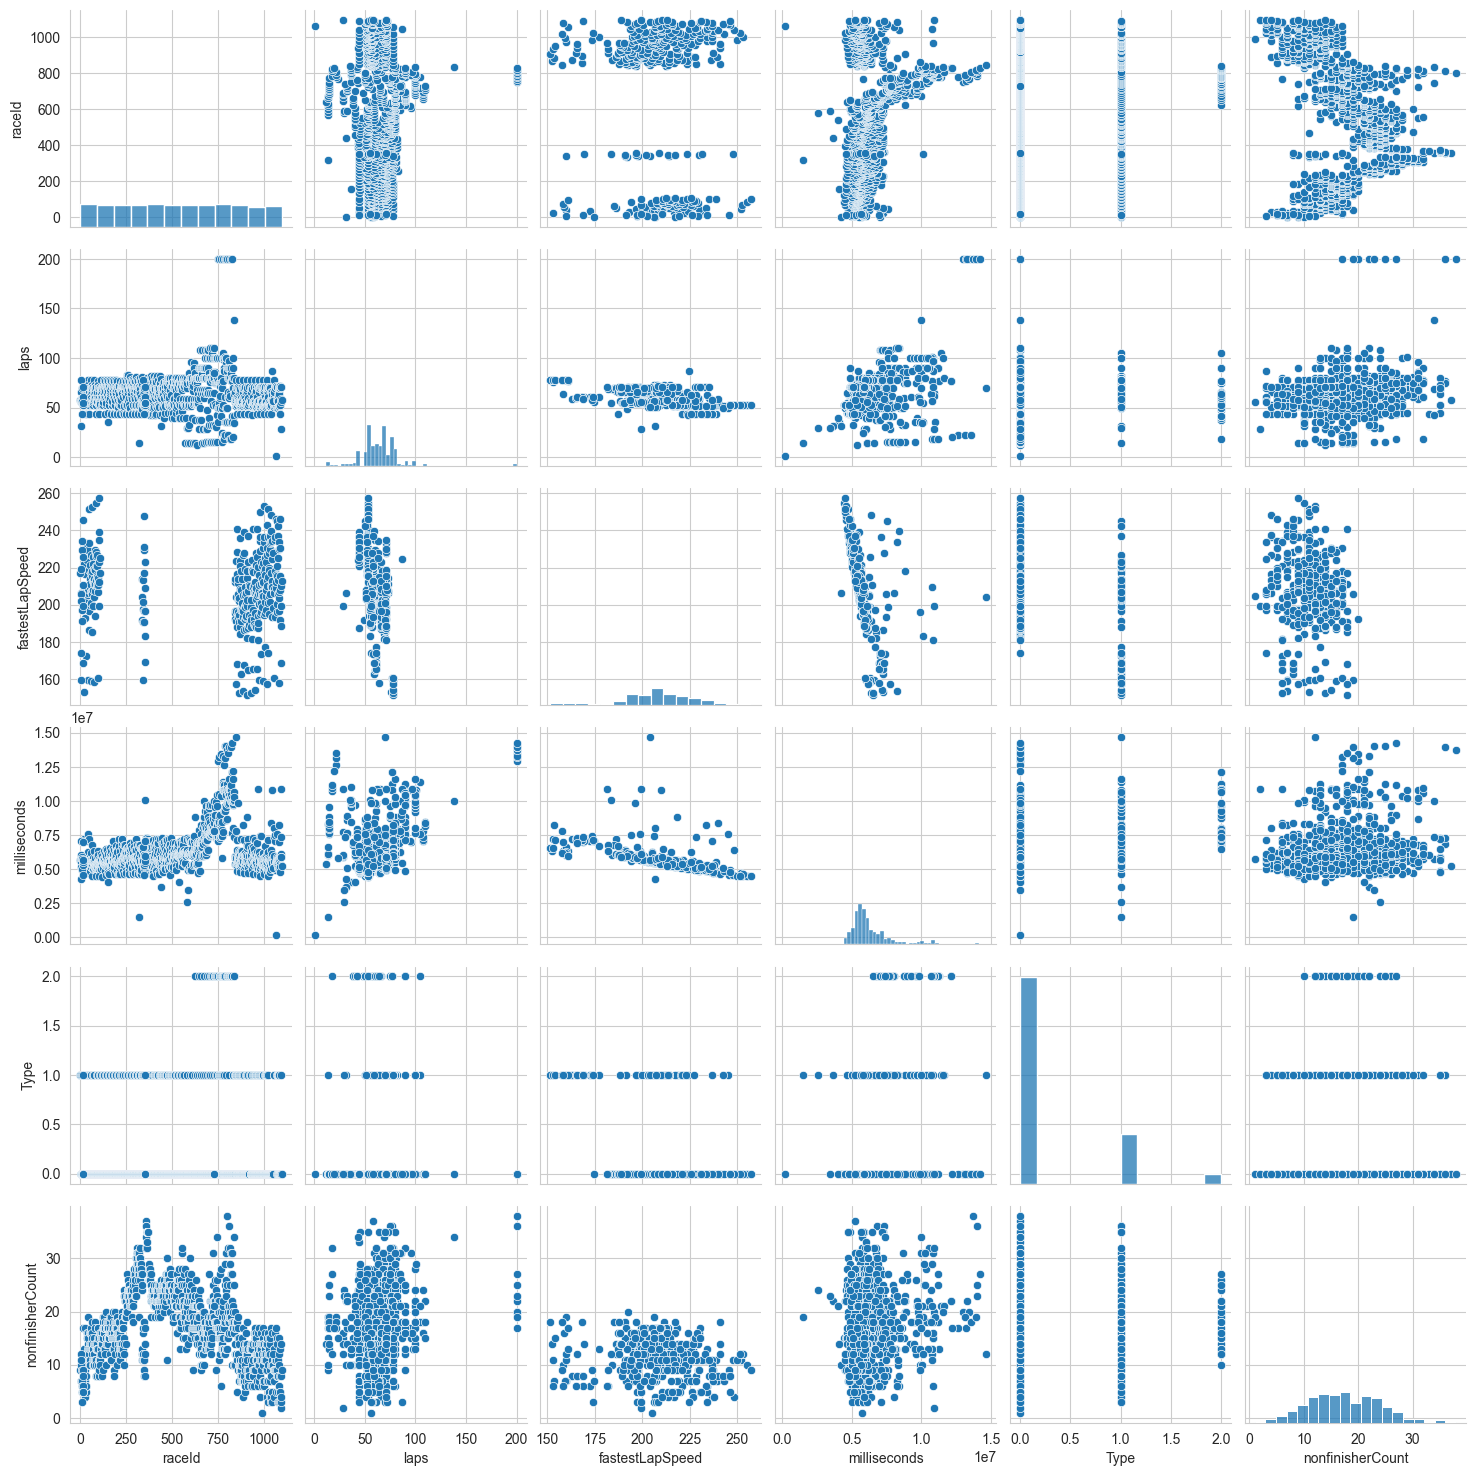

In [137]:
sns.pairplot(df_gt)

In [138]:
df_gt.isna().sum()

raceId                0
laps                  0
fastestLapSpeed     717
milliseconds          0
Type                  0
nonfinisherCount      1
dtype: int64

In [161]:
df_gt = df_gt[["raceId","laps","nonfinisherCount","milliseconds","Type"]].dropna()

In [165]:
X = df_gt[["raceId","laps","nonfinisherCount","milliseconds"]].to_numpy()
y = df_gt[["Type"]].to_numpy()

In [166]:
print(X.shape)
print(y.shape)

(1081, 4)
(1081, 1)


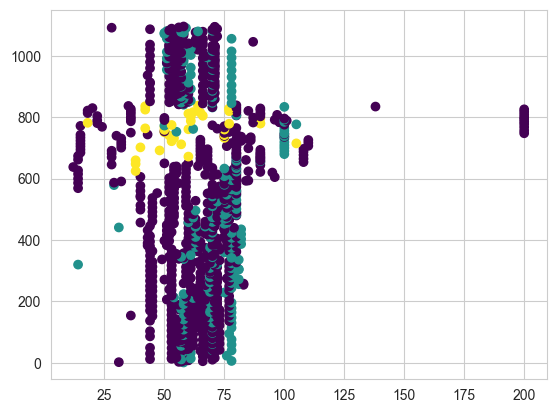

In [167]:
plt.scatter(X[:,1],X[:,0],c=y, cmap="viridis")

In [168]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.66917995, -0.33953144, -0.05944507, -0.43171869],
       [-1.66599599, -0.4376425 , -0.9498856 , -0.56022959],
       [-1.66281203, -0.38858697, -0.9498856 , -0.56725021],
       ...,
       [ 1.75675791,  0.29819047, -0.50466534, -0.29469216],
       [ 1.75994187,  0.29819047, -1.98873289, -0.29631929],
       [ 1.76312583, -0.33953144, -1.24669912, -0.68909197]])

How did our Clustering Algo Do?


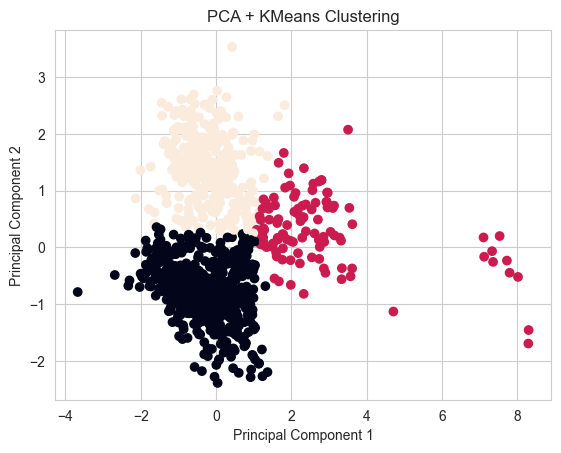

How does it map to real-life? - Not well


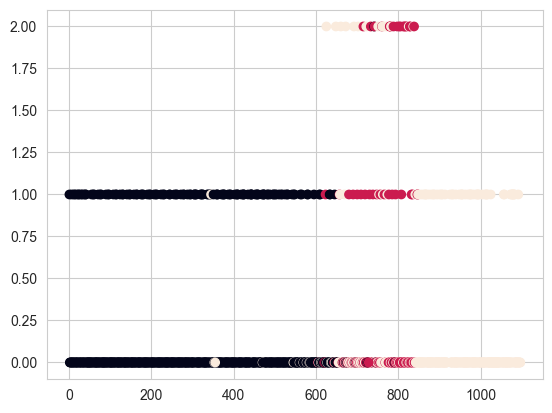

In [176]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

# Visualization
print("How did our Clustering Algo Do?")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + KMeans Clustering')
plt.show()

print("How does it map to real-life? - Not well")
plt.scatter(X[:,0],y, c=clusters)
plt.show()